# Modelo base treinado com dados normalizados de 0 a 1

In [1]:
!pip install scikit-learn

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sn

### Combinação de dados agregados da aeronave 091
Nesta célula, realizamos a combinação dos conjuntos de dados previamente agregados para a aeronave de identificação 091. Os dados agregados referentes às ocorrências de falhas (flights_combined_data_fail_091) e os dados agregados para os casos sem falhas (flights_combined_data_091) foram concatenados para criar um único conjunto de dados combinado, denominado combined_data_091. Essa ação visa possibilitar análises comparativas entre as situações de falha e não falha, permitindo identificar diferenças significativas nos comportamentos médios durante as diversas fases de voo da aeronave.

In [3]:
flights_combined_data_fail_091 = pd.read_parquet("flights_combined_data_fail_091.parquet")
flights_combined_data_091 = pd.read_parquet("flights_combined_data_091.parquet")

combined_data_091 = pd.concat([flights_combined_data_fail_091, flights_combined_data_091])


In [4]:
combined_data_091

,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,basBleedLowPressF-1a,...,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,-123.076923,-67.668269,-123.076923,25.300481,0.000000,0.000000,4.206731
1,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,-128.000000,-70.375000,-128.000000,26.312500,0.000000,0.000000,4.375000
2,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.089155,-128.000000,-74.472070,-107.410679,31.393501,0.000000,0.000000,-57.039020
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.813036,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.128543,0.186964,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Normalização de dados para a aeronave 091
Nesta célula, realizamos a normalização dos dados combinados da aeronave de identificação 091. Utilizamos o escalonador MinMaxScaler para transformar os valores em uma escala entre 0 e 1, preservando as proporções relativas entre eles. Os dados normalizados são então armazenados no DataFrame combined_data_091, substituindo os valores originais. A normalização permite que as diferentes grandezas presentes nos dados tenham um impacto equilibrado em análises subsequentes, facilitando a interpretação e comparação das informações.

In [7]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(combined_data_091)
combined_data_091 = pd.DataFrame(normalized_data, columns=combined_data_091.columns)

print(combined_data_091)

   phaseOfFlight-1  message0418DAA-1  message0422DAA-1  amscHprsovDrivF-1a   
0              0.0              0.00               0.0                 0.0  \
1              0.0              0.75               1.0                 0.0   
2              0.0              1.00               1.0                 0.0   
3              0.0              0.00               0.0                 0.0   
4              0.5              0.00               0.0                 0.0   
5              1.0              0.00               0.0                 0.0   

   amscHprsovDrivF-1b  amscHprsovDrivF-2b  amscPrsovDrivF-1a   
0                 0.0                 0.0                0.0  \
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
5                 0.0                 0.0                0.0   

   a

### Conversão de Tipos de Coluna para a Aeronave 091
Aqui apresentamos uma função chamada convert_columns que é projetada para converter os tipos de coluna do DataFrame combined_data_091. A função percorre todas as colunas no DataFrame e verifica se o tipo de dados é 'float64' ou 'int64'. Se for 'float64', a coluna é convertida para 'float32' para economizar espaço e otimizar o desempenho. Se for 'int64', a coluna é convertida para 'int32'. A conversão de tipos de dados apropriados pode ajudar a reduzir o uso de memória e melhorar a eficiência das operações realizadas nos dados.

In [8]:
def convert_columns(combined_data_091):
    for coluna in combined_data_091.columns:
        if combined_data_091[coluna].dtype == 'float64':
            combined_data_091[coluna] = combined_data_091[coluna].astype('float32')

        if combined_data_091[coluna].dtype == 'int64':
            combined_data_091[coluna] = combined_data_091[coluna].astype('int32')

    return combined_data_091

### Criação da coluna "has_failure" 
Nesta célula, criamos uma nova coluna chamada "has_failure" no DataFrame combined_data_091. Essa coluna é gerada a partir da avaliação das colunas "message0418DAA-1" e "message0422DAA-1", onde um valor diferente de zero indica a presença de falha. Utilizamos a operação de OR (|) para verificar se pelo menos uma das colunas contém um valor não nulo. Em seguida, convertemos os valores booleanos resultantes em inteiros, representando a presença (1) ou ausência (0) de falha. A nova coluna "has_failure" agrega informações cruciais sobre a ocorrência de falhas, o que pode ser útil para análises posteriores e modelagem de dados.

In [9]:
combined_data_091['has_failure'] = (combined_data_091['message0418DAA-1'] != 0) | (combined_data_091['message0422DAA-1'] != 0)
combined_data_091['has_failure'] = combined_data_091['has_failure'].astype(int)

print(combined_data_091)

   phaseOfFlight-1  message0418DAA-1  message0422DAA-1  amscHprsovDrivF-1a   
0              0.0              0.00               0.0                 0.0  \
1              0.0              0.75               1.0                 0.0   
2              0.0              1.00               1.0                 0.0   
3              0.0              0.00               0.0                 0.0   
4              0.5              0.00               0.0                 0.0   
5              1.0              0.00               0.0                 0.0   

   amscHprsovDrivF-1b  amscHprsovDrivF-2b  amscPrsovDrivF-1a   
0                 0.0                 0.0                0.0  \
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
5                 0.0                 0.0                0.0   

   a

### Divisão dos dados em conjuntos de Treino e Teste para modelagem
Nesta célula, realizamos a divisão do conjunto de dados combined_data_091 em conjuntos de treino e teste, essenciais para a modelagem e avaliação de modelos de aprendizado de máquina. Definimos as variáveis features para representar as colunas que serão usadas como características de entrada e target para representar a coluna "has_failure", que é o nosso objetivo de previsão. Utilizando a função train_test_split, dividimos os dados em conjuntos de treino (X_train, y_train) e teste (X_test, y_test), onde 80% dos dados são destinados ao treinamento e 20% ao teste. O parâmetro random_state é definido para garantir a reprodutibilidade dos resultados. Essa divisão é fundamental para avaliar o desempenho de modelos e suas capacidades de generalização.

In [10]:
features = ['message0418DAA-1', 'message0422DAA-1', 'phaseOfFlight-1', 'bleedOnStatus-2b', 'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a']
target = 'has_failure'

X_train, X_test, y_train, y_test = train_test_split(combined_data_091[features], combined_data_091[target], test_size=0.2, random_state=42)

### Treinamento e Avaliação do Modelo de Regressão Logística
Neste trecho de código, treinamos um modelo de Regressão Logística utilizando os conjuntos de treino X_train e y_train. Após o treinamento, realizamos previsões utilizando o conjunto de teste X_test e calculamos a acurácia do modelo comparando as previsões (y_pred) com os valores reais y_test. Além disso, geramos um relatório de classificação (classification_report) que fornece informações detalhadas sobre métricas de desempenho como precisão, recall e F1-score para cada classe. As métricas ajudam a avaliar o quão bem o modelo está realizando a previsão da presença ou ausência de falha.

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



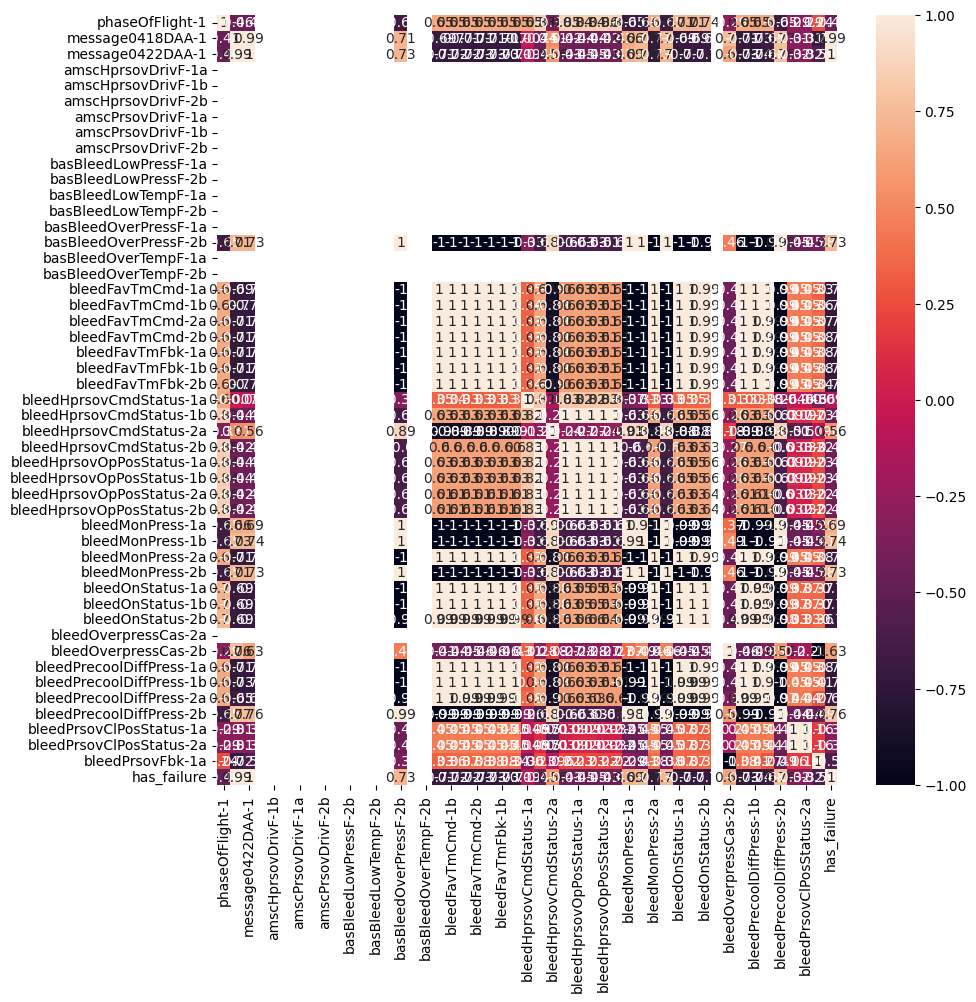

In [17]:
plt.figure(figsize = (10, 10))
corr_matrix = combined_data_091.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()